# Assignment 2: Determine Object Angle 


* Credits: 30
* Submit .ipynb, .html to maucher(at)hdm-stuttgart.de

In this task the angle of an object (rotor blade) in an image shall be estimated by determining the maximum in the histogram of a suitable feature.


## Import and display image
**Task:** Load the image [propel.png](../Data/propel.png) from the `Data`direcory as a single channel greyscale image.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

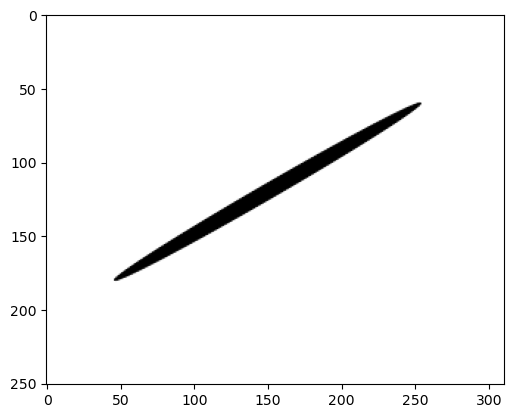

In [55]:
original_img = Image.open("../Data/propel.png")
img = np.array(original_img.convert("L"))
plt.imshow(img,cmap='Greys_r');

## Determine and calculate suitable feature
**Task:** In this task the angle of an object (rotor blade) in an image shall be estimated by determining the maximum in the histogram of a suitable feature.

1. Which feature is suitable for this task?
2. Determine this feature in the image by applying corresponding filters
3. Display the *image*, which contains this features by applying *imshow()* from matplotlib's pyplot.


1. One feature that would be suitable for this task would be the edges of the image. There the angle of the biggest edge could be determined to get the angle of the rotor blade.

In [4]:
im = np.float32(img) / 255.0
 
# Calculate gradient with Sobel
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=9)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=9)

# Calculate gradient magnitude and direction (in degrees)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

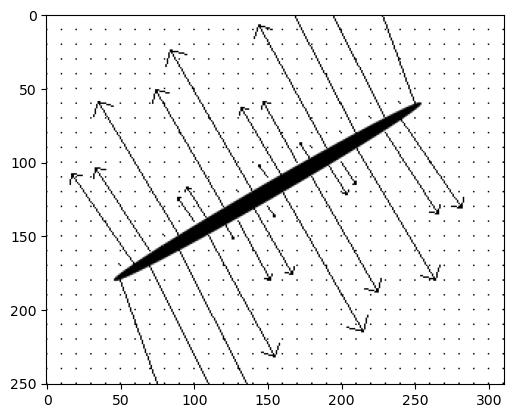

In [7]:
# Create a copy of the image to draw arrows on
img_arrows = img.copy()

# Get the shape of the image
rows, cols = img.shape[:2]
rel_a = []

# Loop over the pixels of the image
for i in range(0, rows, 10):
    for j in range(0, cols, 10):
        # Get the magnitude and angle of the pixel
        m = mag[i,j]
        a = angle[i,j]

        # Calculate the end point of the arrow
        x2 = int(j + 0.00005*m * np.cos(a * np.pi / 180))
        y2 = int(i + 0.00005*m * np.sin(a * np.pi / 180))

        # Draw the arrow on the image
        cv2.arrowedLine(img_arrows, (j,i), (x2,y2), (0,255,0), 1)
        if a > 0 and m > 50000:
            rel_a.append(a)
        
# Display the image with arrows
img_rgb = cv2.cvtColor(img_arrows, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);

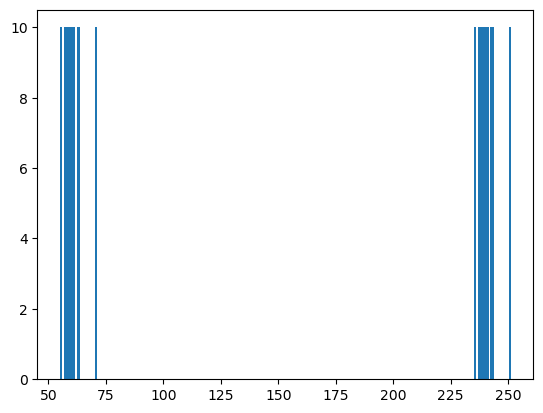

In [8]:
plt.bar(rel_a, 10);

In [9]:
# Get the remainder of dividing the angles by 180
angles_mod = np.mod(rel_a, 180)
final_angle = np.mean(angles_mod)+90  # +90 because those were the normal vectors
print("The angle of the rotor_blade is:", final_angle)

The angle of the rotor_blade is: 150.00614166259766


## Calculate Histogram and estimate angle
**Task:** Determine the histogram, which displays the frequency of the values of your feature and estimate the angle of the object. 

One type of histogram that is useful for edges is the HOG histogram. It is designed for 2D images and can map the gradients of the image, which helps to detect edges.

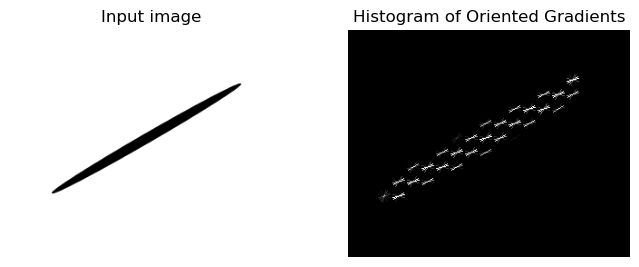

In [15]:
from skimage import exposure
from skimage.feature import hog

fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [53]:
# Trying to count the clusters in the HOG output to get the frequency of the values

counter = 0
indicies = []
for idx, f in enumerate(fd):
    if f != 0.00:
        counter += 1
        indicies.append(idx)

clusterCounter = 0
for idx, element in enumerate(indicies):
    if idx == counter-1:
        continue
    else:
        nextOne = indicies[idx+1]
        elementPlus = element + 1
        if elementPlus == nextOne:
            continue
        else: clusterCounter += 1
print(f"{clusterCounter} gradients are detetced by HOG in the input image.")


32 gradients are detetced by HOG in the input image.


It was unfortunately unclear how to calculate the angles of the gradients with HOG. Nevertheless, here we refer to the previous task, in which the angle of the largest edge was calculated.

## Video-based RPM determination
**Task:** How can this angle prediction be applied to determine the rotations per minute of a rotor blade of a wind turbine?

To determine this, a default setting of the turbine could be defined, from which the angle is then measured. <br>
Then, for example, in a video of the turbine, the setting could always be counted in the frames per second to get the rotations per minute.

In [59]:
# for a further implementation, rotated versions of the original input image could be used

rotated_img_90 = original_img.rotate(90)

rotated_img_45 = original_img.rotate(45)


After that, all images could be put inside a loop that checks for the angle of the default setting, like we did in the first task. <br>
In a real world scenario, we could use the frames of a video per minute so that we could look for the angle of the default setting.